# Using Twitter to Predict National Flu Outbreaks

In [54]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TweetTokenizer, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
import multiprocessing
from sklearn import utils
from pandas.tools.plotting import lag_plot, autocorrelation_plot
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm  
import itertools

In [14]:
#import annotated data
df = pd.read_csv('annotated_tweets.csv', engine='python')
df = df.drop('Unnamed: 0', axis=1)

# Natural Language Processing

In [15]:
def tokenize(tweet):
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)
    return tknzr.tokenize(tweet)

def classifiers(x_train, y_train):
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    log = LogisticRegression()
    log.fit(x_train, y_train)
    forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
    forest.fit(x_train, y_train)
    gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
    gradboost.fit(x_train, y_train)
    adaboost = AdaBoostClassifier(n_estimators=100)
    adaboost.fit(x_train, y_train)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(x_train, y_train)
    return [nb, log, forest, gradboost, adaboost, svm]

def classifier_performance(vectorizer, train_data, test_data, y_test):
    accuracy_df = []
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    #instantiate classifier objects
    classifier_list = classifiers(x_train, y_train)
    #display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        accuracy_df.append(accuracy*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    classifiers_key = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Gradient Boost', 'Adaboost',
                      'Support Vector Machine']
    accuracy_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    fin_accuracy_df = accuracy_df[['Model', 'Accuracy']]
    return fin_accuracy_df

In [16]:
data = df['text']
labels = df['status']
train_data, test_data, y_train, y_test = train_test_split(data, labels)
tfidfvec = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
tfidfvec2 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
tfidfvec3 = TfidfVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))
countvec = CountVectorizer(stop_words='english', tokenizer=tokenize)
countvec2 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,2))
countvec3 = CountVectorizer(stop_words='english', tokenizer=tokenize, ngram_range=(1,3))

## Count Vectorization

**Unigram**

In [17]:
classifier_performance(countvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.428571
1,Logistic Regression,72.165899
2,Random Forest,57.880184
3,Gradient Boost,64.055300
4,Adaboost,69.216590
5,Support Vector Machine,69.585253


**Bigram**

In [18]:
classifier_performance(countvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.073733
1,Logistic Regression,73.271889
2,Random Forest,57.880184
3,Gradient Boost,63.778802
4,Adaboost,70.322581
5,Support Vector Machine,70.967742


**Trigram**

In [19]:
classifier_performance(countvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.811060
1,Logistic Regression,72.534562
2,Random Forest,57.603687
3,Gradient Boost,63.041475
4,Adaboost,71.336406
5,Support Vector Machine,71.612903


## TF-IDF Vectorization

**Unigram**

In [20]:
classifier_performance(tfidfvec, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.442396
1,Logistic Regression,72.811060
2,Random Forest,57.511521
3,Gradient Boost,65.161290
4,Adaboost,70.691244
5,Support Vector Machine,71.059908


**Bigram**

In [21]:
classifier_performance(tfidfvec2, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,72.258065
1,Logistic Regression,72.350230
2,Random Forest,57.880184
3,Gradient Boost,65.806452
4,Adaboost,68.294931
5,Support Vector Machine,73.456221


**Trigram**

In [22]:
classifier_performance(tfidfvec3, train_data, test_data, y_test)

,Model,Accuracy
0,Naive Bayes,71.981567
1,Logistic Regression,71.797235
2,Random Forest,57.880184
3,Gradient Boost,64.700461
4,Adaboost,68.755760
5,Support Vector Machine,72.903226


In [ ]:
#store in metrics dataframe
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)
#add shallow learning metrics too 
metrics_df.to_csv('metrics_df.csv')

# Feature Importance

In [28]:
def top_feature_extraction(vectorizer, num_features):
    unrelated_doc_matrix = vectorizer.transform(df[df.status == 0].text)
    related_doc_matrix = vectorizer.transform(df[df.status == 1].text)
    unrelated_tf = np.sum(unrelated_doc_matrix,axis=0)
    related_tf = np.sum(related_doc_matrix,axis=0)
    unrelated = np.squeeze(np.asarray(unrelated_tf))
    related = np.squeeze(np.asarray(related_tf))
    term_freq_df = pd.DataFrame([unrelated,related],columns=vectorizer.get_feature_names()).transpose()
    term_freq_df.columns = ['unrelated', 'related']
    term_freq_df['total'] = term_freq_df['unrelated'] + term_freq_df['related']
    display(term_freq_df.sort_values(by='total', ascending=False).iloc[:num_features])
    return term_freq_df

In [29]:
term_freq_df = top_feature_extraction(tfidfvec2, 10)

,unrelated,related,total
flu,101.896494,128.303943,230.200437
getting,64.993931,117.508834,182.502765
swine,78.223103,82.402590,160.625694
swine flu,77.960849,80.638963,158.599813
getting flu,37.923713,79.316843,117.240556
shot,56.816112,50.905636,107.721748
flu shot,54.123741,47.151493,101.275234
bird,53.064336,40.178997,93.243333
bird flu,50.725241,37.600805,88.326046
getting swine,31.631197,33.613312,65.244509


In [30]:
def plot_most_predictive_features(vectorizer):
    x_train = vectorizer.fit_transform(train_data)
    x_test = vectorizer.transform(test_data)
    chi2score = chi2(x_train, y_train)[0]

    plt.figure(figsize=(15,10))
    wscores = list(zip(vectorizer.get_feature_names(), chi2score))
    wchi2 = sorted(wscores, key=lambda x:x[1])
    topchi2 = list(zip(*wchi2[-20:]))
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    plt.barh(x,topchi2[1], align='center', alpha=0.2)
    plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
    plt.yticks(x, labels)
    plt.xlabel('$\chi^2$')
    plt.title('Most predictive features and associated Chi-square scores')

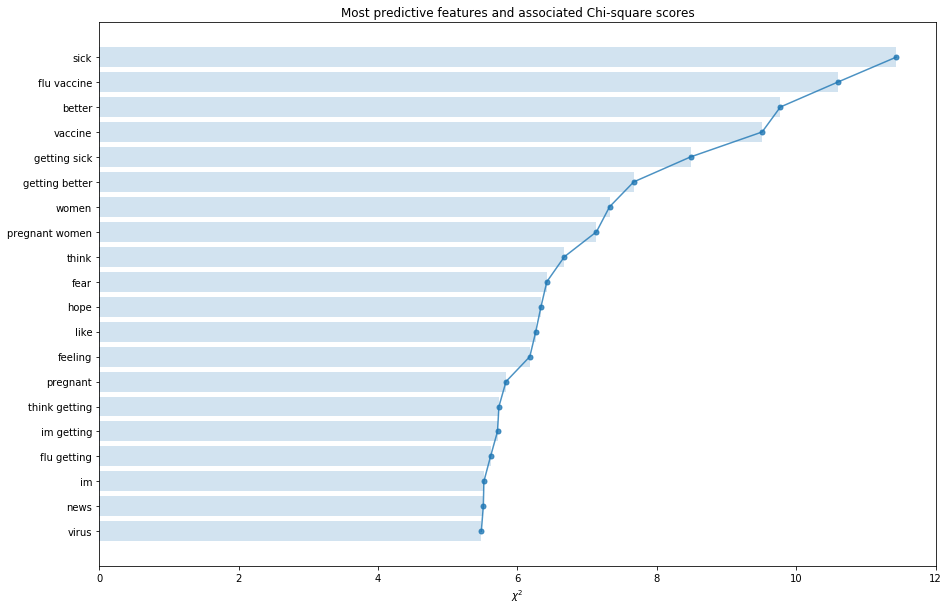

In [31]:
plot_most_predictive_features(tfidfvec2)

# Exploratory Data Analysis

## Class Distribution

No handles with labels found to put in legend.


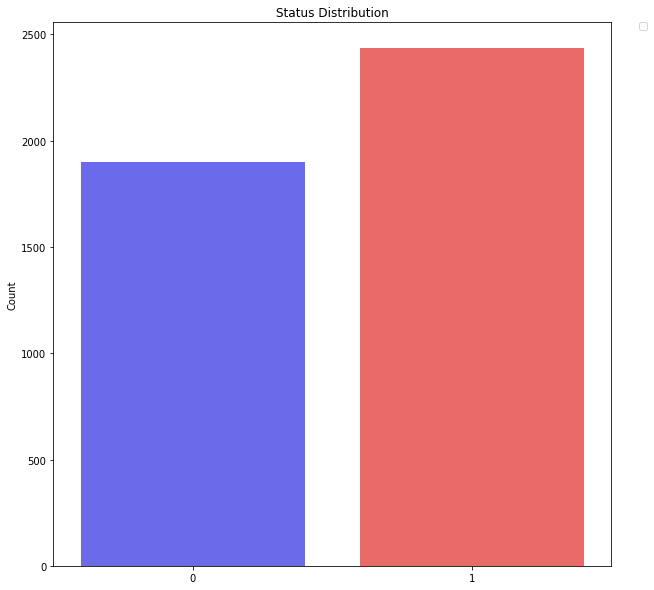

In [32]:
#distribution of annotated dataset (0/1)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="status", data=df, palette='seismic')
ax.set_title('Status Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# In-Depth Classifier Performance

In [33]:
def print_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
    print("Precision Score for model: {:.4}%".format(precision * 100))
    print("Recall Score for model: {:.4}%".format(recall * 100))
    print("F1 Score for model: {:.4}%".format(f1 * 100))
    return accuracy, precision, recall, f1
    

def cm_plot(labels, predictions, normalize=False, cmap='Spectral'):
    cm = confusion_matrix(labels, predictions)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, ['POS', 'NEG'], ['POS', 'NEG'])
    sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap=cmap)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.colorbar()
    plt.show()

def plot_roc_curve(labels, predictions, y_score):
    fpr, tpr, thresholds = roc_curve(labels, y_score)
    print('AUC: {}'.format(auc(fpr, tpr)))
    #Seaborns Beautiful Styling
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [35]:
x_train = tfidfvec2.fit_transform(train_data)
x_test = tfidfvec2.transform(test_data)

## Naive Bayes

Accuracy Score for model: 72.26%
Precision Score for model: 69.49%
Recall Score for model: 89.59%
F1 Score for model: 78.27%


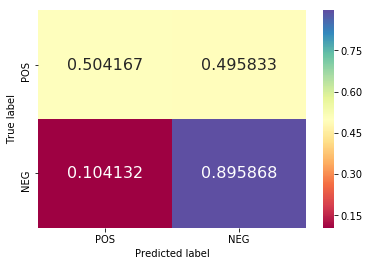

AUC: 0.8067320936639119


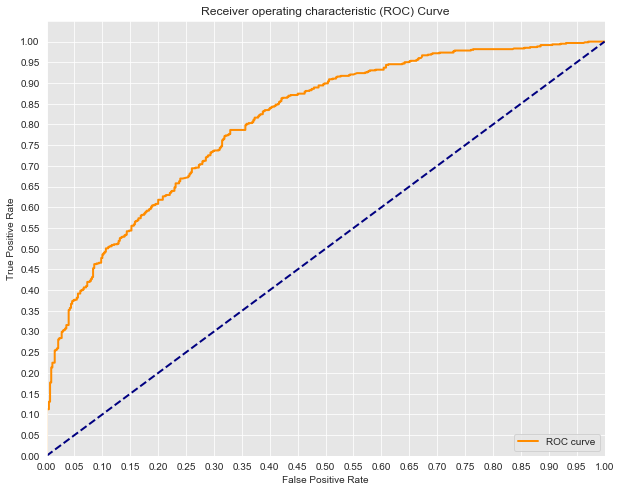

In [36]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
preds = nb.predict(x_test)
y_score = nb.predict_proba(x_test)

print_metrics(nb,x_test,y_test)
cm_plot(y_test,preds, normalize=True, cmap='Spectral')
plot_roc_curve(y_test,preds, y_score[:,1])

## Logistic Regression

### Hyperparameter Tuning

**L1 vs. L2 Regularization**

AUC for l1: 0.7887035123966942
AUC for l2: 0.8165254820936639


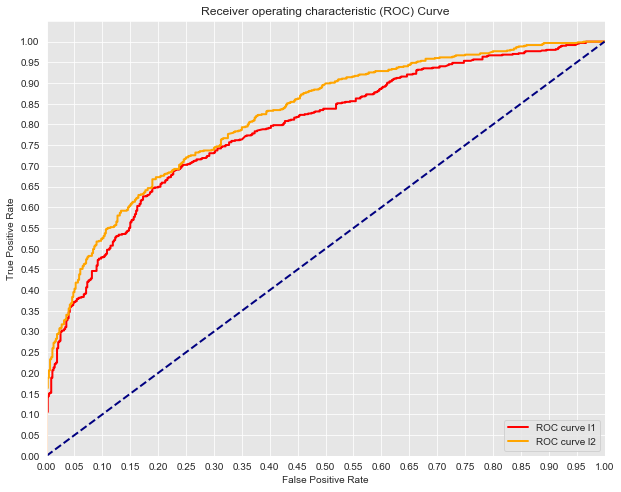

In [37]:
#compare L1 & L2 regularization
penalties = ['l1', 'l2']
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, pen in enumerate(penalties):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, penalty=pen) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(pen), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Class Weights**

AUC for balanced: 0.8157128099173554
AUC for None: 0.8165254820936639


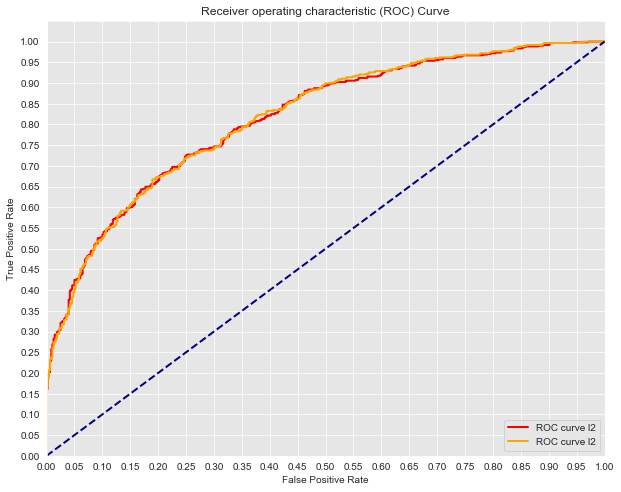

In [38]:
wgts = ['balanced', None]
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, wgt in enumerate(wgts):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, class_weight=wgt) #Starter code
    model_log = logreg.fit(x_train, y_train)
    #Predict
    y_hat_test = logreg.predict(x_test)
    y_score = logreg.fit(x_train, y_train).decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(str(wgt), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy Score for model: 72.35%
Precision Score for model: 72.2%
Recall Score for model: 81.98%
F1 Score for model: 76.78%


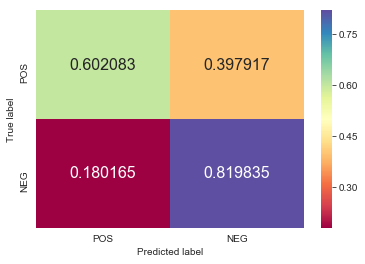

AUC: 0.8151618457300276


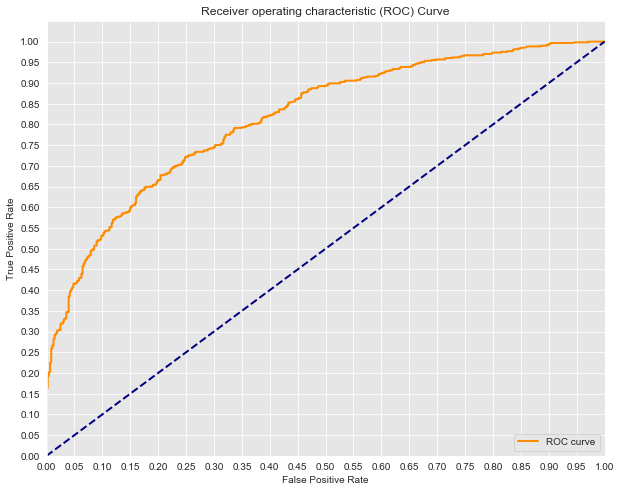

In [39]:
log = LogisticRegression()
log = log.fit(x_train, y_train)
preds = log.predict(x_test)
y_score = log.decision_function(x_test)

print_metrics(log,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score)

## Random Forest

Accuracy Score for model: 57.79%
Precision Score for model: 56.94%
Recall Score for model: 99.67%
F1 Score for model: 72.48%


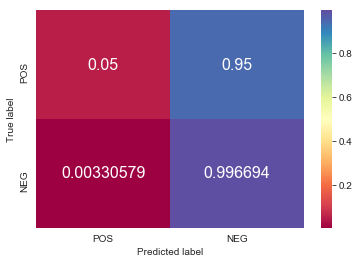

AUC: 0.7640151515151515


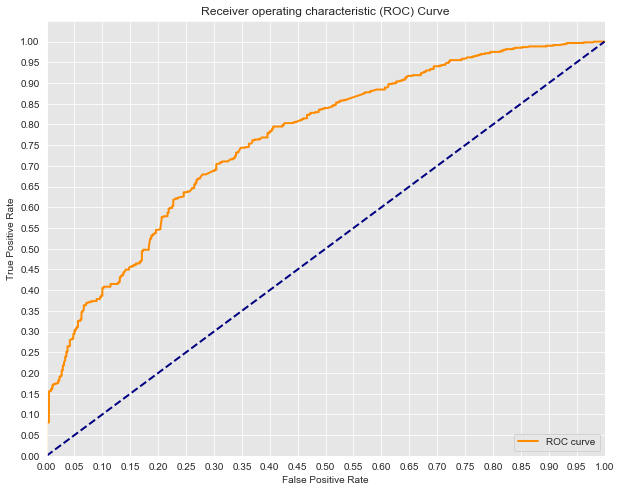

In [40]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train, y_train)
preds = forest.predict(x_test)
y_score = forest.predict_proba(x_test)

print_metrics(forest,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Gradient Boost

Accuracy Score for model: 65.81%
Precision Score for model: 63.48%
Recall Score for model: 91.07%
F1 Score for model: 74.81%


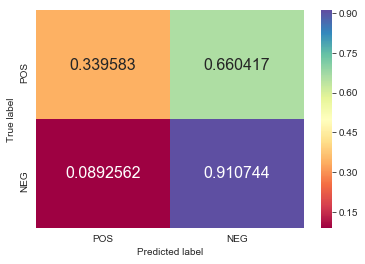

AUC: 0.7373519283746556


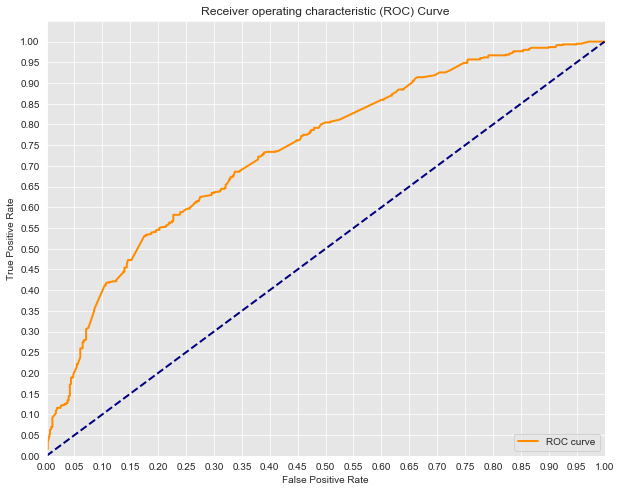

In [41]:
#adjust learning rate
gradboost = GradientBoostingClassifier(random_state = 123, max_depth = 5, learning_rate = 0.01)
gradboost.fit(x_train, y_train)
preds = gradboost.predict(x_test)
y_score = gradboost.predict_proba(x_test)

print_metrics(gradboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Adaboost

Accuracy Score for model: 68.29%
Precision Score for model: 69.8%
Recall Score for model: 76.03%
F1 Score for model: 72.78%


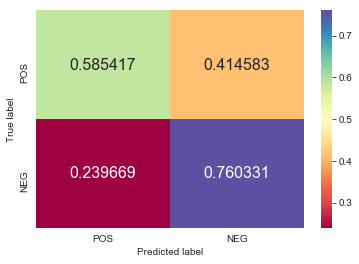

AUC: 0.7424070247933885


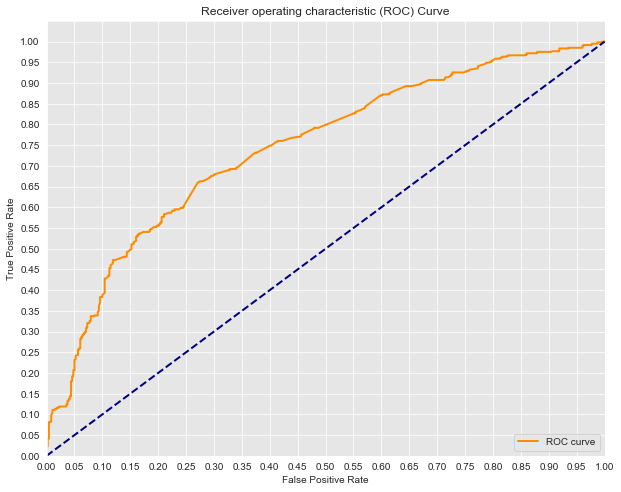

In [42]:
adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)
preds = adaboost.predict(x_test)
y_score = adaboost.predict_proba(x_test)

print_metrics(adaboost,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds,y_score[:,1])

## Support Vector Machine

Accuracy Score for model: 73.46%
Precision Score for model: 74.2%
Recall Score for model: 80.33%
F1 Score for model: 77.14%


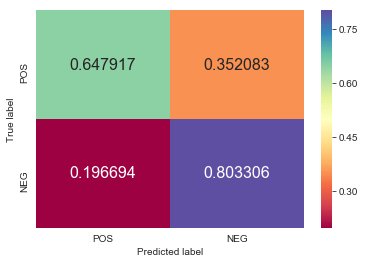

AUC: 0.8037775482093664


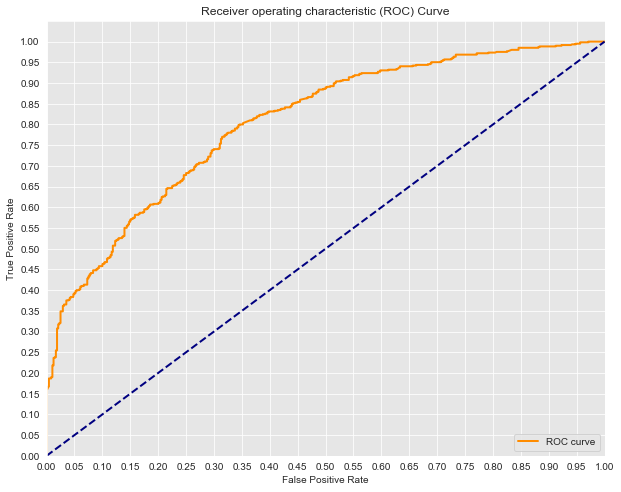

In [43]:
svm = SVC(kernel='linear', probability=True)
svm = svm.fit(x_train, y_train) 
preds = svm.predict(x_test)
y_score = svm.predict_proba(x_test)

print_metrics(svm,x_test,y_test)
cm_plot(y_test,preds,normalize=True)
plot_roc_curve(y_test,preds, y_score[:,1])

## Multilayer Perceptron

In [44]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers
from keras.models import model_from_json
from sklearn.externals import joblib
from keras import regularizers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Hyperparameters

In [46]:
epochs=25
optimizer = optimizers.Adam(lr=0.00003, decay=0.0001)
# optimizer = optimizers.SGD(lr=0.003, decay=0.0001, momentum=0.9)
batch_size=32
loss='binary_crossentropy'
activation='relu'
out_activation='sigmoid'

tbcallback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=batch_size, 
                                         write_graph=True, write_images=True)

In [50]:
model = Sequential()
model.add(Dense(150, input_dim=len(tfidfvec2.get_feature_names()), kernel_regularizer=regularizers.l1(0.005), activation=activation))
model.add(Dropout(0.3))
model.add(Dense(75, kernel_regularizer=regularizers.l1(0.005), activation=activation))
model.add(Dropout(0.3))
model.add(Dense(1, activation=out_activation))
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 150)               3439800   
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 75)                11325     
_________________________________________________________________
dropout_6 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 76        
Total params: 3,451,201
Trainable params: 3,451,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#clear logs first
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    verbose=1, validation_data=[x_test, y_test], callbacks=[tbcallback])

In [ ]:
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)
mlp_accuracy = results_test[1]
print(results_train)
print(results_test)
val_dict = history.history

loss_values = val_dict['loss']
val_loss_values = val_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'b.', label='Validation loss')
plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = val_dict['acc'] 
val_acc_values = val_dict['val_acc']
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'r.', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Classifier Comparison

In [ ]:
metrics_df = classifier_performance(tfidfvec2, train_data, test_data, y_test)
#add deep learning metric

In [ ]:
#roc curves

# Time Series Analysis

## Data Preparation

### CDC Data

In [55]:
def clean_df(df):
    df.reset_index(inplace=True) # Resets the index, makes factor a column
    df.drop('PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS',axis=1,inplace=True) # drop factor from axis 1 and make changes permanent by inplace=True
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df["Date"] = pd.to_datetime(df.WEEK.astype(str)+
                              df.YEAR.astype(str).add('-1') ,format='%W%Y-%w')
    df.set_index(df['Date'], inplace=True)
    df['ILITOTAL'] = df['ILITOTAL'].astype('int64')
    return df

In [56]:
cdc_16 = pd.read_csv('FluViewPhase2Data/16_17.csv')
cdc_17 = pd.read_csv('FluViewPhase2Data/17_18.csv')

cdc_16 = clean_df(cdc_16)
cdc_16 = cdc_16.drop(['AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK',  
              '%UNWEIGHTED ILI', 'TOTAL PATIENTS'], axis=1)
cdc_17 = clean_df(cdc_17)
cdc_17 = cdc_17.drop(['REGION TYPE', 'REGION', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
               'AGE 50-64', 'AGE 65', 'NUM. OF PROVIDERS', 'Date', 'YEAR','WEEK', '% WEIGHTED ILI', 
              '%UNWEIGHTED ILI'], axis=1)
cdc_df = pd.concat([cdc_16, cdc_17])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Twitter Data

### Google Trends Data

In [57]:
google_df = pd.read_csv('google_trends/multiTimeline.csv')
google_df.reset_index(inplace=True) # Resets the index, makes factor a column
google_df.columns = google_df.iloc[0]
google_df = google_df.iloc[1:]
google_df.rename(columns={'Week': 'Date'}, inplace=True)
google_df.rename(columns={'flu: (United States)': 'Count'}, inplace=True)
google_df.set_index(google_df['Date'], inplace=True)
google_df.drop(['Date'], axis=1, inplace=True)
google_df['Count'] = google_df['Count'].astype('int64')

## Data Visualizations

### CDC Data

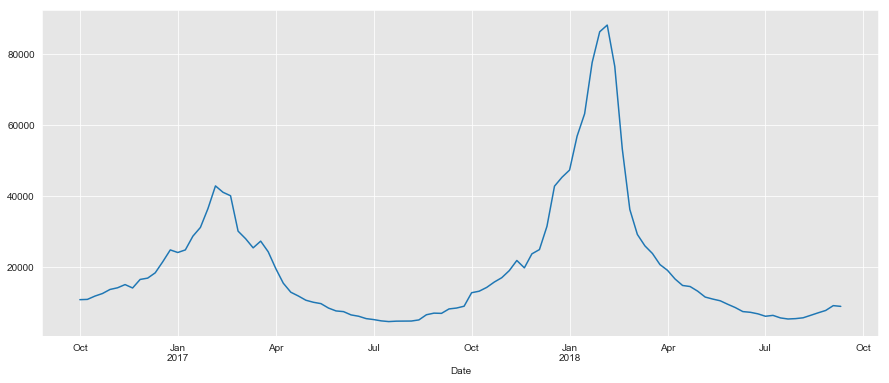

In [58]:
cdc_df.plot()
plt.legend().set_visible(False)
plt.show()

### Twitter Data

### Google Trends Data

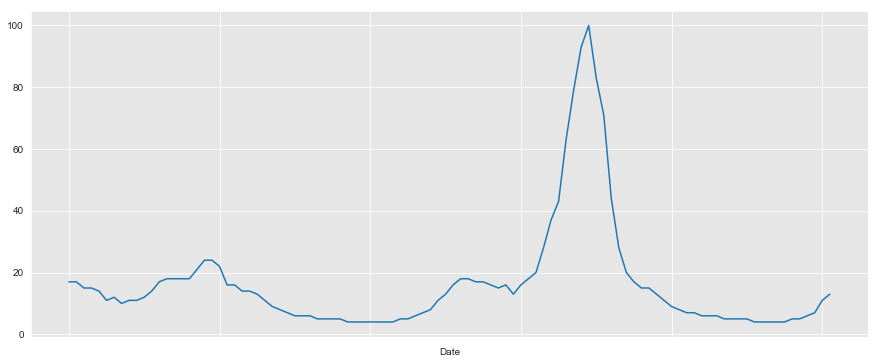

In [59]:
google_df.plot()
plt.legend().set_visible(False)
plt.show()

## Assessing Stationarity

In [60]:
#Plot rolling statistics
def check_stationarity(df,window,count):
    moving_avg = df.rolling(window).mean() #4 week lag
    moving_std = df.rolling(window).std()

    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(count, autolag='AIC')

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
#mean and standard deviation increasing with time = not stationary

### Dickey-Fuller Test

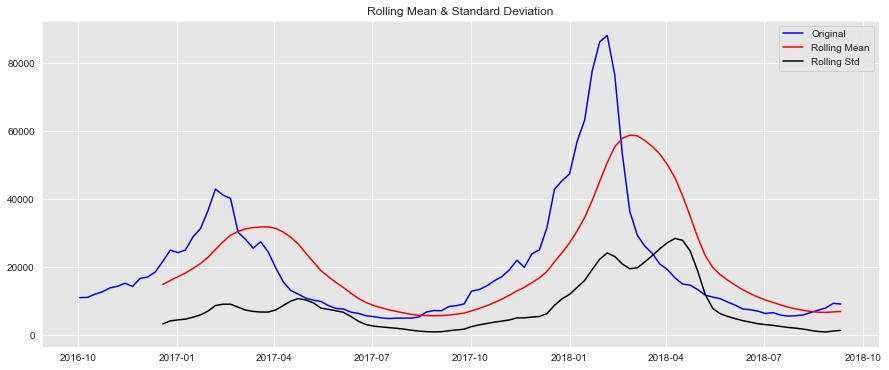

Results of Dickey-Fuller Test:
Test Statistic                 -2.843437
p-value                         0.052332
#Lags Used                      5.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [62]:
# Perform the dickey Fuller test 
cdc_df.dropna(inplace=True)
check_stationarity(cdc_df, 12, cdc_df['ILITOTAL'])
#null: time-series is non-stationary 
#p-value: 0.05
#p-value > 0.05, fail to reject null --> time-series is non-stationary at 95% confidence 

### Decomposition Visualization

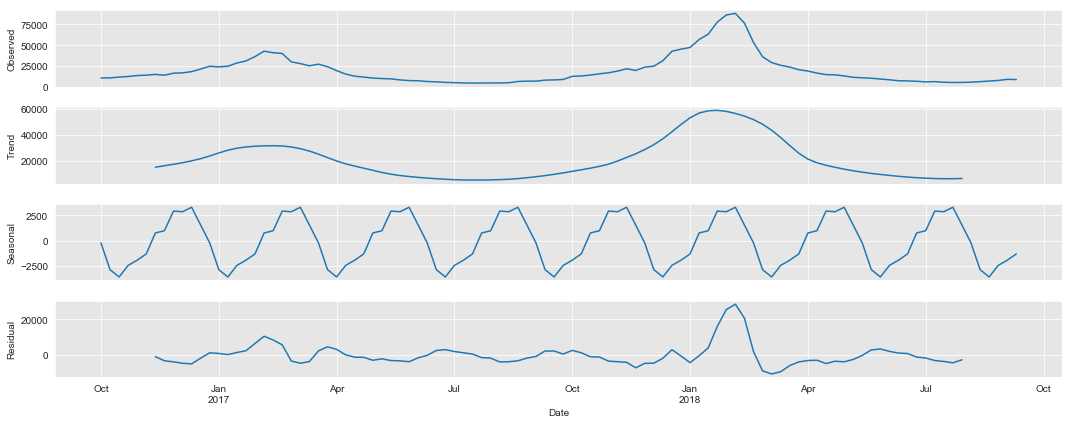

In [63]:
result = seasonal_decompose(cdc_df, freq=12) #every 4 weeks
result.plot()
plt.show()

## Stationarization of Data

### Seasonal Differencing

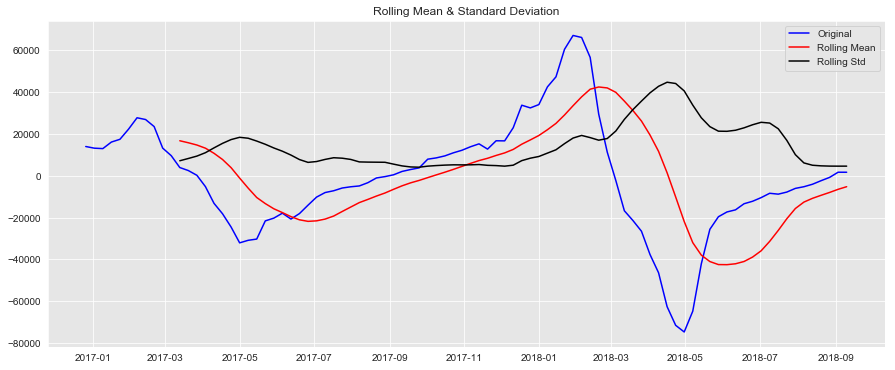

Results of Dickey-Fuller Test:
Test Statistic                 -3.447466
p-value                         0.009443
#Lags Used                      5.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [67]:
cdc_seasonal_diff= cdc_df - cdc_df.shift(12)
cdc_seasonal_diff.dropna(inplace=True)
check_stationarity(cdc_seasonal_diff, 12, cdc_seasonal_diff['ILITOTAL'])
#p-value: 0.002264 -- stationary data 

## ACF & PACF Visualizations

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


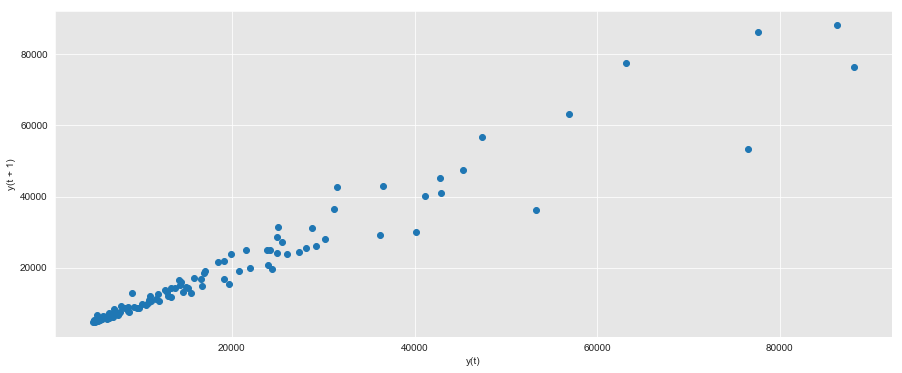

In [68]:
#plot the observation at the previous time step 
#(t-1) with the observation at the next time step (t+1) as a scatter plot.
#plots the visits(t) on the x-axis against 
#the visits on the previous day (t-1) on the y-axis.
lag_plot(cdc_df)
#clear correlation

### Pearson Correlation

In [69]:
# creates a lagged version of the dataset and calculates a 
#correlation matrix of each column with other columns, including itself.
values = cdc_df['ILITOTAL']
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
#strong positive correlation (0.89) between the observation and the lag=2 value.

          t-1       t+1
t-1  1.000000  0.892759
t+1  0.892759  1.000000


### Autocorrelation Plot

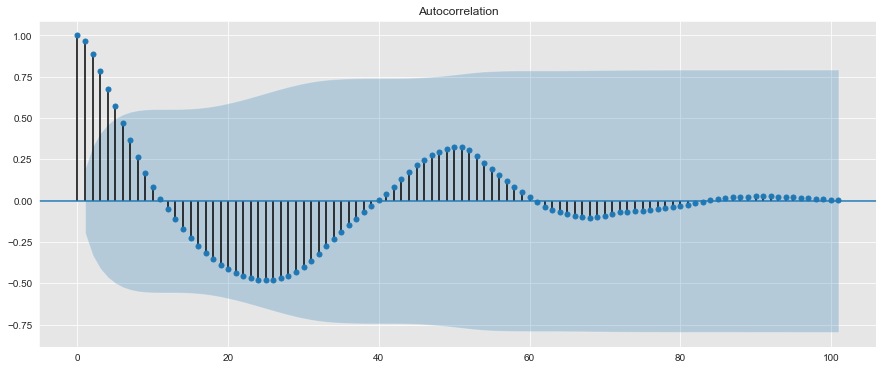

In [70]:
plot_acf(cdc_df)
plt.show()

### PACF Chart for Seasonal Differences

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


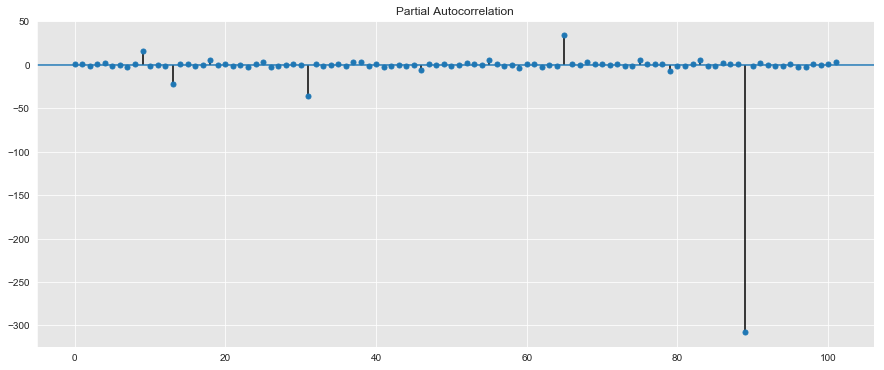

In [71]:
plot_pacf(cdc_df)
plt.show()

# ARIMA Modeling

## 'Naive' Forecast: Persistence Model
Baseline

Naively assumes that if lag=2:

The number of visits two weeks ago can predict the number of visits for this week

Test RMSE: 1517.920


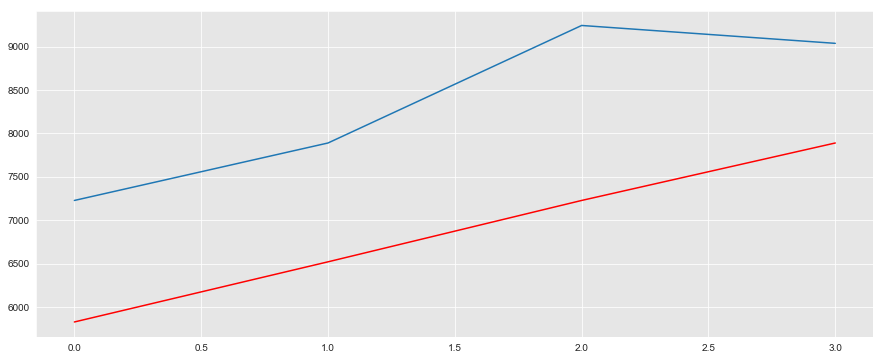

In [73]:
# create lagged dataset
values = cdc_df['ILITOTAL']
dataframe = concat([values.shift(2), values], axis=1)
dataframe.columns = ['t', 't+2']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-4], X[len(X)-4:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

## Autoregressive Model, CDC Data Only

In [ ]:
def arima_grid_search():
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(cdc_df['ILITOTAL'],
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df['aic'].idxmin()]

# Next Steps:

* Time-series analysis with CDC, Twitter, and Google Trends data to assess which model is best at forecasting outbreaks, using CDC data as 'ground truth' and AIC as a metric
* Add more annotated tweets
* Doc2Vec & PCA
* Dashboard visualizations